Animation saved as schrodinger_animation.mp4


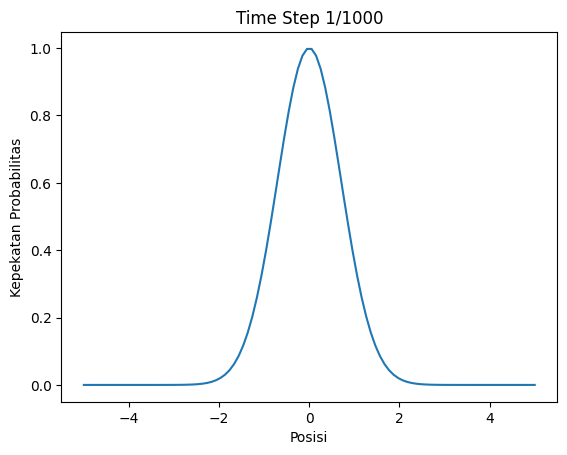

In [ ]:
import cupy as cp
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def solve_schrodinger_eqn(potential, x_min, x_max, num_points, total_time, num_steps):
    # Membuat interval ruang pada GPU
    x = cp.linspace(x_min, x_max, num_points)
    dx = x[1] - x[0]

    # Membuat interval waktu
    dt = total_time / num_steps

    # Inisialisasi fungsi gelombang pada GPU
    psi = cp.zeros((num_steps, num_points), dtype=cp.complex128)
    psi[0, :] = cp.exp(-0.5 * (x ** 2))  # Fungsi gelombang awal

    # Menyiapkan potensial energi pada GPU
    V = potential(x)

    # Menyelesaikan persamaan Schrodinger pada GPU
    for i in range(num_steps - 1):
        # Hitung turunan kedua menggunakan diferensial terbatas
        d2_psi = (psi[i, :-2] - 2 * psi[i, 1:-1] + psi[i, 2:]) / dx**2

        # Update fungsi gelombang
        psi[i + 1, 1:-1] = psi[i, 1:-1] - 1j * dt * (d2_psi + V[1:-1] * psi[i, 1:-1])

    return cp.asnumpy(x), cp.asnumpy(psi)

# Mendefinisikan fungsi potensial
def potential(x):
    # Potensial osilator harmonik
    k = 1.0  # Spring constant
    return 0.5 * k * x**2

# Membuat parameter
x_min = -5.0
x_max = 5.0
num_points = 100
total_time = 1.0
num_steps = 1000

# Menyelesaikan persamaan Schrodinger menggunakan pemrograman paralel berbasis GPU
x, psi = solve_schrodinger_eqn(potential, x_min, x_max, num_points, total_time, num_steps)

# Membuat gambar dan sumbu pada animasi
fig, ax = plt.subplots()

# Fungsi untuk memperbarui plot pada setiap frame animasi
def update(i):
    ax.clear()
    ax.plot(x, np.abs(psi[i, :])**2)
    ax.set_xlabel("Posisi")
    ax.set_ylabel("Kepekatan Probabilitas")
    ax.set_title(f"Time Step {i+1}/{num_steps}")

# Membuat Animasi
interval = 10  # Sesuaikan nilai interval untuk mengontrol kecepatan animasi
ani = animation.FuncAnimation(fig, update, frames=num_steps, interval=interval)

# Menyimpan animasi sebagai MP4
filename = "schrodinger_animation.mp4"
ani.save(filename, writer="ffmpeg")

print(f"Animation saved as {filename}")

Animation saved as schrodinger_animation_CPU.mp4


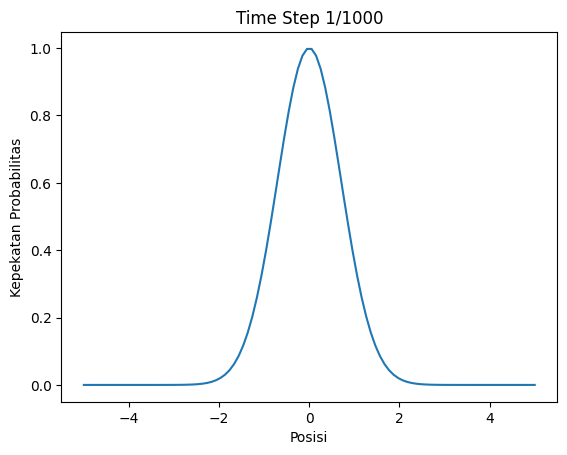

In [ ]:
#PROGRAM MENGGUNAKAN CPU
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def solve_schrodinger_eqn(potential, x_min, x_max, num_points, total_time, num_steps):
    # Membuat interval ruang pada GPU
    x = np.linspace(x_min, x_max, num_points)
    dx = x[1] - x[0]

    # Membuat interval waktu
    dt = total_time / num_steps

    # Inisialisasi fungsi gelombang pada GPU
    psi = np.zeros((num_steps, num_points), dtype=np.complex128)
    psi[0, :] = np.exp(-0.5 * (x ** 2))  # Fungsi gelombang awal

    # Menyiapkan potensial energi pada GPU
    V = potential(x)

    # Menyelesaikan persamaan Schrodinger pada GPU
    for i in range(num_steps - 1):
        # Hitung turunan kedua menggunakan diferensial terbatas
        d2_psi = (psi[i, :-2] - 2 * psi[i, 1:-1] + psi[i, 2:]) / dx**2

        # Update fungsi gelombang
        psi[i + 1, 1:-1] = psi[i, 1:-1] - 1j * dt * (d2_psi + V[1:-1] * psi[i, 1:-1])

    return x, psi

# Mendefinisikan fungsi potensial
def potential(x):
    # Potensial osilator harmonik
    k = 1.0  # Spring constant
    return 0.5 * k * x**2

# Membuat parameter
x_min = -5.0
x_max = 5.0
num_points = 100
total_time = 1.0
num_steps = 1000

# Menyelesaikan persamaan Schrodinger menggunakan pemrograman paralel berbasis GPU
x, psi = solve_schrodinger_eqn(potential, x_min, x_max, num_points, total_time, num_steps)

# Membuat gambar dan sumbu pada animasi
fig, ax = plt.subplots()

# Fungsi untuk memperbarui plot pada setiap frame animasi
def update(i):
    ax.clear()
    ax.plot(x, np.abs(psi[i, :])**2)
    ax.set_xlabel("Posisi")
    ax.set_ylabel("Kepekatan Probabilitas")
    ax.set_title(f"Time Step {i+1}/{num_steps}")

# Membuat Animasi
interval = 10  # Sesuaikan nilai interval untuk mengontrol kecepatan animasi
ani = animation.FuncAnimation(fig, update, frames=num_steps, interval=interval)

# Menyimpan animasi sebagai MP4
filename = "schrodinger_animation_CPU.mp4"
ani.save(filename, writer="ffmpeg")

print(f"Animation saved as {filename}")